# Lab 2 Samuel Bieberich

In [2]:
#imports

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

## 1. Signal to Noise Ratio


### Generate a tone with frequency 2 MHz and amplitude 1 V. Sample the tone at frequencies Fs = 5 MHz.


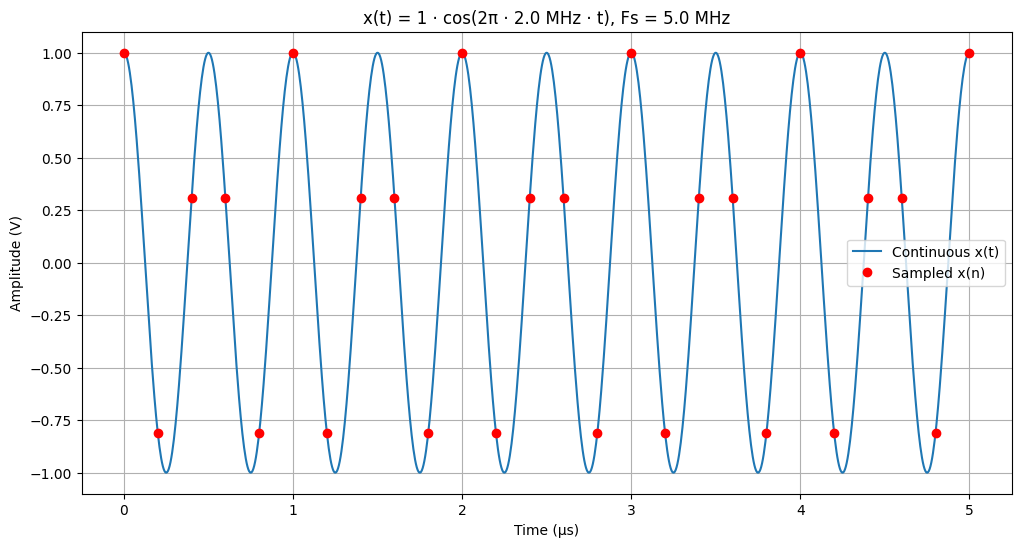

In [3]:
F = 2e6  
Fs = 5e6  
A = 1    

t = np.linspace(0, 5e-6, 1000) 

x = A * np.cos(2 * np.pi * F * t)

n = np.arange(0, 26) #12 is sample number 
ts = n / Fs

xs = A * np.cos(2 * np.pi * F * ts)

plt.figure(figsize=(12, 6))

plt.plot(t*1e6, x, label='Continuous x(t)')
plt.plot(ts*1e6, xs, 'ro', label='Sampled x(n)')
plt.title(f'x(t) = {A} · cos(2π · {F/1e6} MHz · t), Fs = {Fs/1e6} MHz')
plt.xlabel('Time (µs)')
plt.ylabel('Amplitude (V)')
plt.legend()
plt.grid(True)

plt.show()


### (a) Add Gaussian noise
- Add Gaussian noise to the sampled sinewave such that the signal SNR is 50 dB.
- Find first the variance of the Gaussian noise needed to produce the target SNR.
- Calculate and plot the Power Spectral Density (PSD) from the DFT of the noisy samples.
- Corroborate that the SNR calculation from the DFT plot gives the theoretical result.
- What would be the variance of a uniformly distributed noise to obtain the same SNR?

In [4]:
signal_power = np.mean(xs ** 2)

snr_target_db = 50  #will not be exact due to the noise being relatively random

#db to linear to make it easier
snr_linear = 10 ** (snr_target_db / 10)

noise_power = signal_power / snr_linear

print("The variance of the Gaussian noise needed to produce the target SNR is:", noise_power)

The variance of the Gaussian noise needed to produce the target SNR is: 5.19230769230769e-06


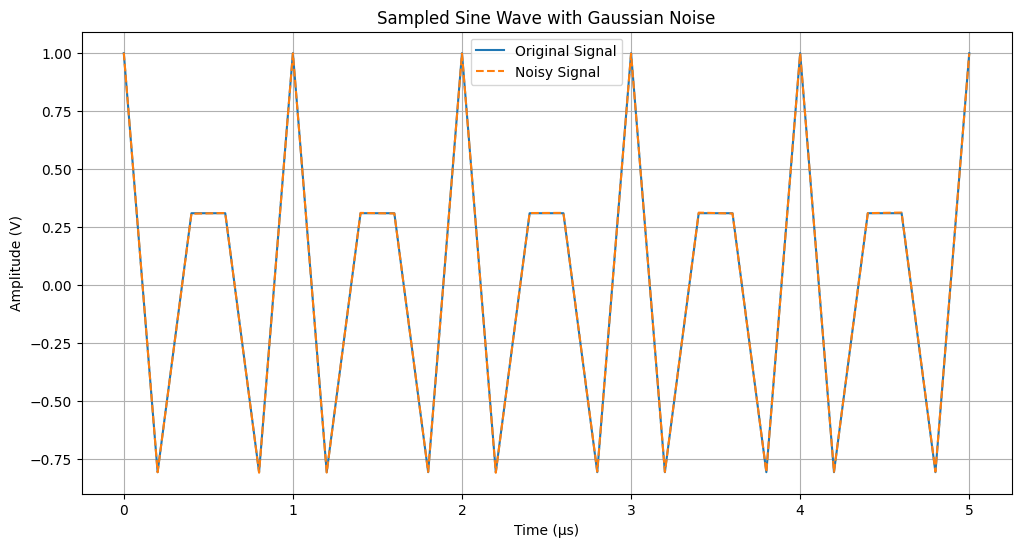

In [5]:
def add_gaussian_noise(signal, snr_db):
    signal_power = np.mean(signal ** 2)
    snr_linear = 10 ** (snr_db / 10)
    noise_power = signal_power / snr_linear
    noise_std = np.sqrt(noise_power)
    noise = np.random.normal(0, noise_std, signal.shape)
    noisy_signal = signal + noise
    return noisy_signal

noisy_signal = add_gaussian_noise(xs, snr_target_db)

plt.figure(figsize=(12, 6))
plt.plot(ts * 1e6, xs, label='Original Signal')
plt.plot(ts * 1e6, noisy_signal, label='Noisy Signal', linestyle='--')
plt.title('Sampled Sine Wave with Gaussian Noise')
plt.xlabel('Time (µs)')
plt.ylabel('Amplitude (V)')
plt.legend()
plt.grid(True)
plt.show()

SNR is 47.68278593768565 dB


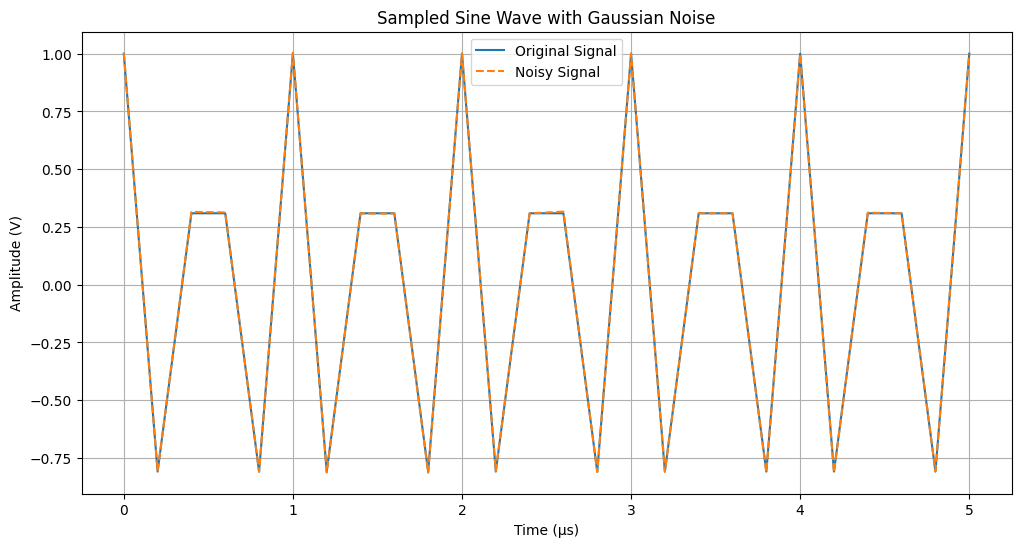

In [6]:
def compute_snr_db(signal, noisy_signal):
    signal_power = np.mean(signal ** 2)
    noise_power = np.mean((signal - noisy_signal) ** 2)
    snr_linear = signal_power / noise_power
    snr_db = 10 * np.log10(snr_linear)
    return snr_db

noisy_signal = add_gaussian_noise(xs, snr_target_db)

snr_db = compute_snr_db(xs, noisy_signal)
print("SNR is", snr_db, "dB")

plt.figure(figsize=(12, 6))
plt.plot(ts * 1e6, xs, label='Original Signal')
plt.plot(ts * 1e6, noisy_signal, label='Noisy Signal', linestyle='--')
plt.title('Sampled Sine Wave with Gaussian Noise')
plt.xlabel('Time (µs)')
plt.ylabel('Amplitude (V)')
plt.legend()
plt.grid(True)
plt.show()

### (b) Apply a window before DFT
- Repeat part (a) using the following windows: Hanning, Hamming, Blackman.
- What are your conclusions?
- **NOTE:** The use of windows mentioned above spreads the signal power. You must take this into account when computing SNR.

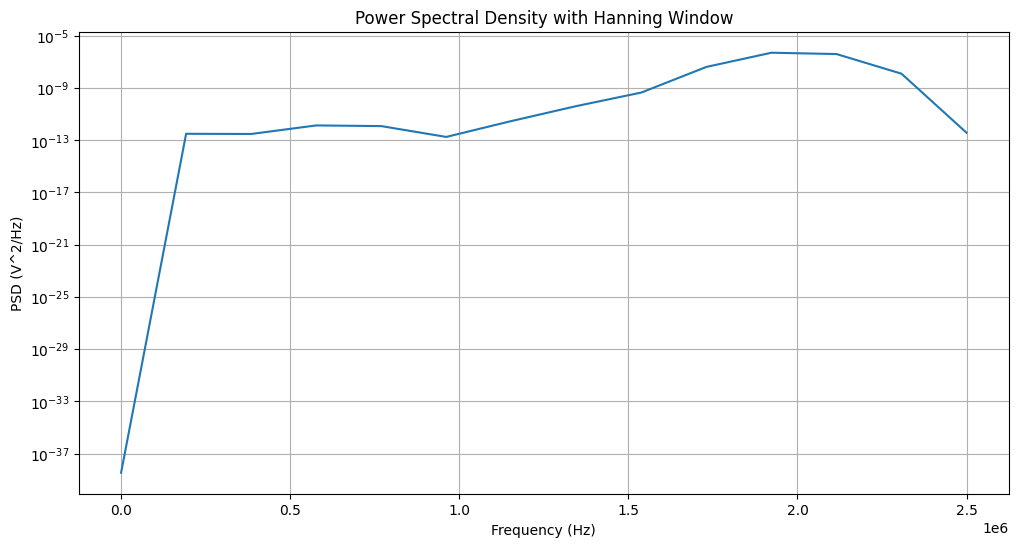

SNR with Hanning window is 50.873619503460354 dB


In [7]:
# Apply Hanning window
hanning_window = np.hanning(len(xs))
xs_windowed = xs * hanning_window

# Add Gaussian noise to the windowed signal
noisy_signal_windowed = add_gaussian_noise(xs_windowed, snr_target_db)

# Compute and plot the Power Spectral Density (PSD) from the DFT of the noisy samples
f, Pxx_den = signal.periodogram(noisy_signal_windowed, Fs)

plt.figure(figsize=(12, 6))
plt.semilogy(f, Pxx_den)
plt.title('Power Spectral Density with Hanning Window')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (V^2/Hz)')
plt.grid(True)
plt.show()

# Compute SNR from the DFT plot
snr_db_windowed = compute_snr_db(xs_windowed, noisy_signal_windowed)
print("SNR with Hanning window is", snr_db_windowed, "dB")

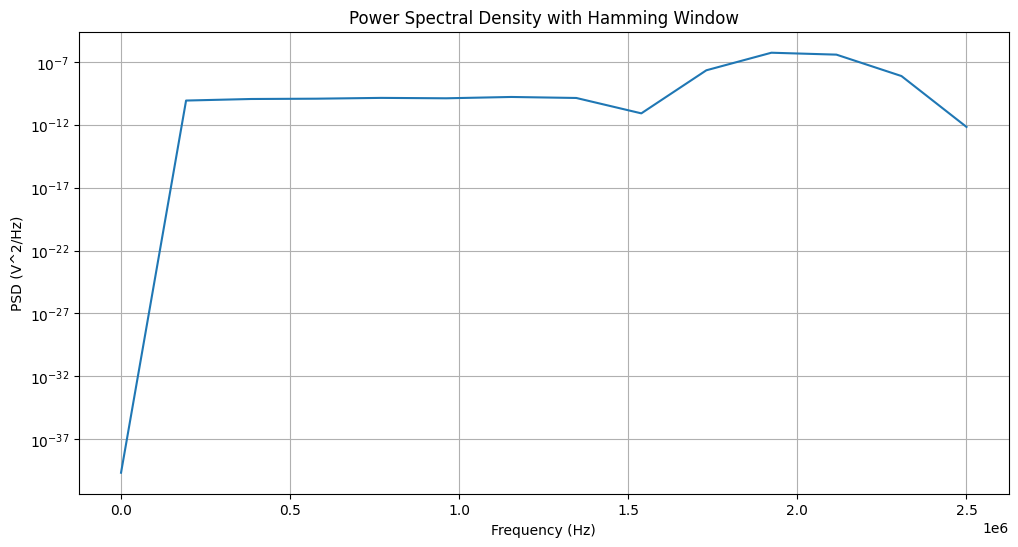

SNR with Hamming window is 50.978320646117 dB


In [8]:
# Apply Hamming window
hamming_window = np.hamming(len(xs))
xs_windowed_hamming = xs * hamming_window

# Add Gaussian noise to the windowed signal
noisy_signal_windowed_hamming = add_gaussian_noise(xs_windowed_hamming, snr_target_db)

# Compute and plot the Power Spectral Density (PSD) from the DFT of the noisy samples
f, Pxx_den_hamming = signal.periodogram(noisy_signal_windowed_hamming, Fs)

plt.figure(figsize=(12, 6))
plt.semilogy(f, Pxx_den_hamming)
plt.title('Power Spectral Density with Hamming Window')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (V^2/Hz)')
plt.grid(True)
plt.show()

# Compute SNR from the DFT plot
snr_db_windowed_hamming = compute_snr_db(xs_windowed_hamming, noisy_signal_windowed_hamming)
print("SNR with Hamming window is", snr_db_windowed_hamming, "dB")

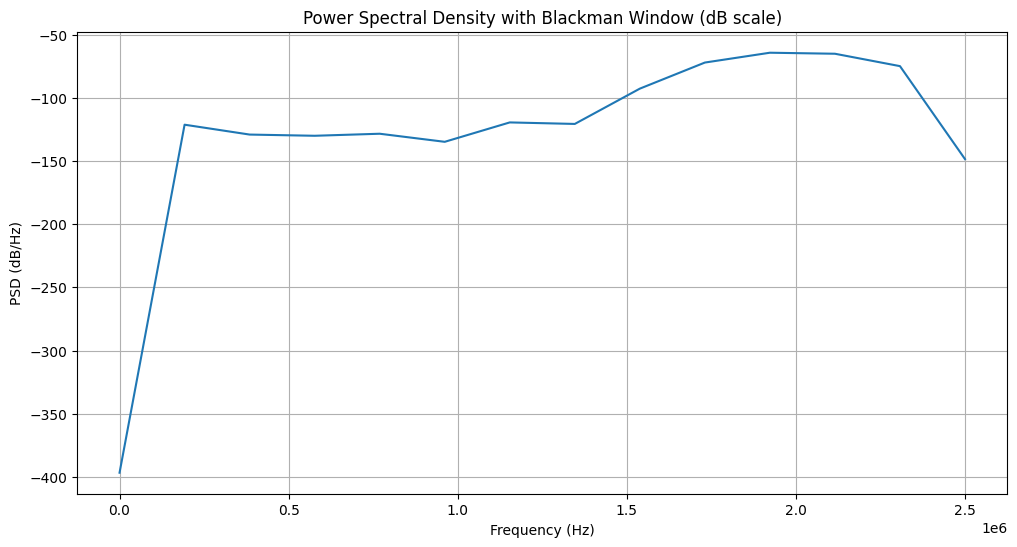

SNR with Blackman window is 49.243433868839276 dB


In [9]:
def psd_to_db(psd):
    return 10 * np.log10(psd)

# Apply Blackman window
blackman_window = np.blackman(len(xs))
xs_windowed_blackman = xs * blackman_window

# Add Gaussian noise to the windowed signal
noisy_signal_windowed_blackman = add_gaussian_noise(xs_windowed_blackman, snr_target_db)

# Compute and plot the Power Spectral Density (PSD) from the DFT of the noisy samples
f, Pxx_den_blackman = signal.periodogram(noisy_signal_windowed_blackman, Fs)

plt.figure(figsize=(12, 6))
plt.plot(f, psd_to_db(Pxx_den_blackman))
plt.title('Power Spectral Density with Blackman Window (dB scale)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (dB/Hz)')
plt.grid(True)
plt.show()

# Compute SNR from the DFT plot
snr_db_windowed_blackman = compute_snr_db(xs_windowed_blackman, noisy_signal_windowed_blackman)
print("SNR with Blackman window is", snr_db_windowed_blackman, "dB")

## 2. Quantization

### (a) Create a perfect quantizer with 6 bits of resolution and flexible sampling rate
- For a 200 MHz full-scale input tone, sample and quantize the sinewave at 400 MHz.
- Plot the PSD of 30 periods.
- What is the SNR?
- Repeat the SNR calculation for 100 periods of the same signal.
- Make conclusions about periodicity of quantization noise and its impact on SNR.
- How can you solve this problem?


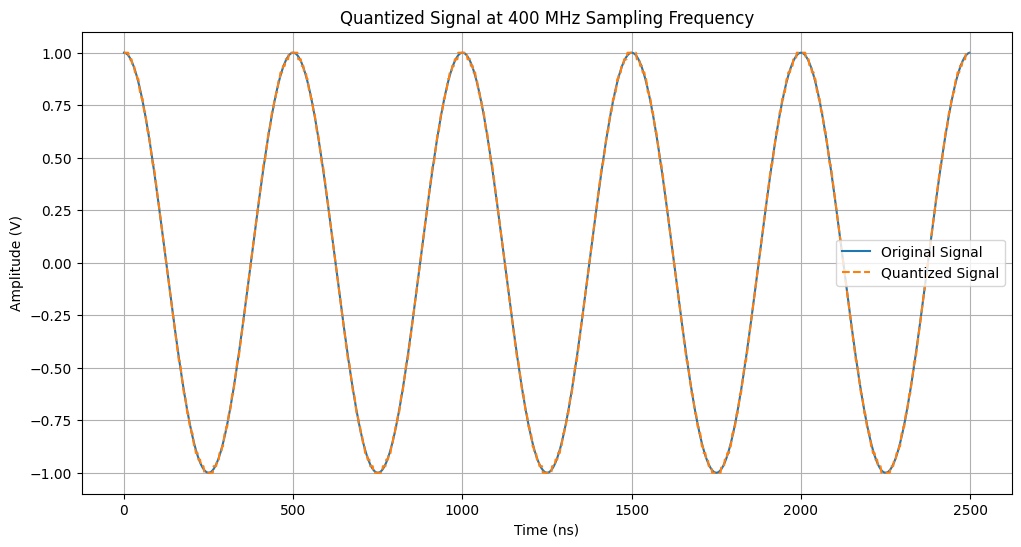

In [14]:
Fs_new = 400e6  # new sampling frequency
num_periods = 5  # number of periods to simulate

t_new = np.arange(0, num_periods / F, 1 / Fs_new)

x_new = A * np.cos(2 * np.pi * F * t_new)

num_bits = 6
quantization_levels = 2**num_bits

x_quantized = np.round(x_new * (quantization_levels / 2)) / (quantization_levels / 2)

# Plot the quantized signal
plt.figure(figsize=(12, 6))
plt.plot(t_new[:1000] * 1e9, x_new[:1000], label='Original Signal')
plt.plot(t_new[:1000] * 1e9, x_quantized[:1000], label='Quantized Signal', linestyle='--')
plt.title('Quantized Signal at 400 MHz Sampling Frequency')
plt.xlabel('Time (ns)')
plt.ylabel('Amplitude (V)')
plt.legend()
plt.grid(True)
plt.show()

### (b) Find an incommensurate sampling frequency
- Choose a sampling frequency larger than the Nyquist rate.
- Plot the PSD of the new samples.
- Calculate the SNR from the figure.

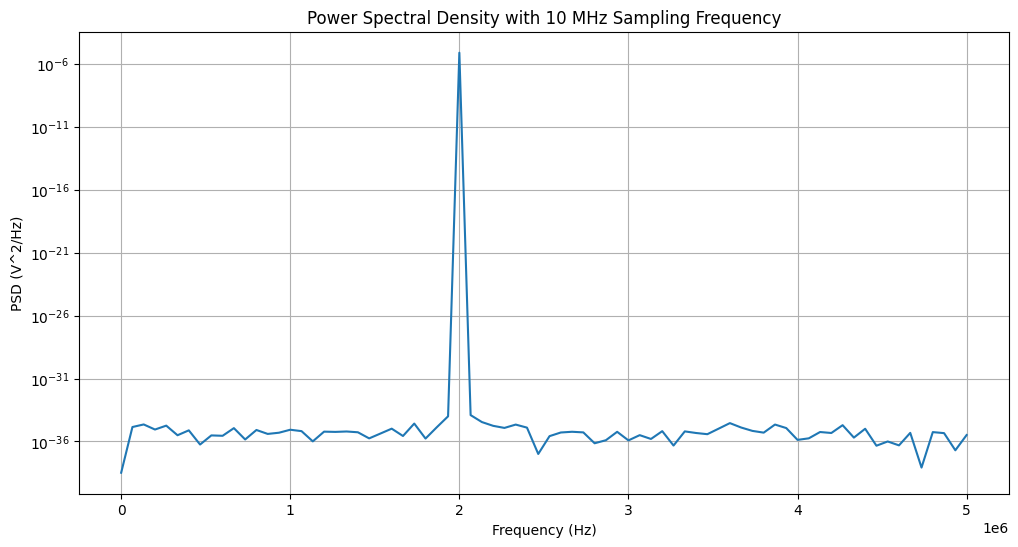

SNR with 10 MHz sampling frequency is 49.693238197808256 dB


In [21]:
Fs_new = 10e6  # new sampling frequency larger than the Nyquist rate
num_periods = 30  

t_new = np.arange(0, num_periods / F, 1 / Fs_new)

x_new = A * np.cos(2 * np.pi * F * t_new)

f, Pxx_den = signal.periodogram(x_new, Fs_new)

plt.figure(figsize=(12, 6))
plt.semilogy(f, Pxx_den)
plt.title('Power Spectral Density with 10 MHz Sampling Frequency')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (V^2/Hz)')
plt.grid(True)
plt.show()

# Calculate the SNR from the PSD plot
snr_db_new = compute_snr_db(x_new, add_gaussian_noise(x_new, snr_target_db))
print("SNR with 10 MHz sampling frequency is", snr_db_new, "dB")

### (c) Repeat (a) using a 12-bit quantizer
- Can you prove from simulations that SNR ~ 6N (where N is the number of bits used) for both cases, N = 6 and N = 12?

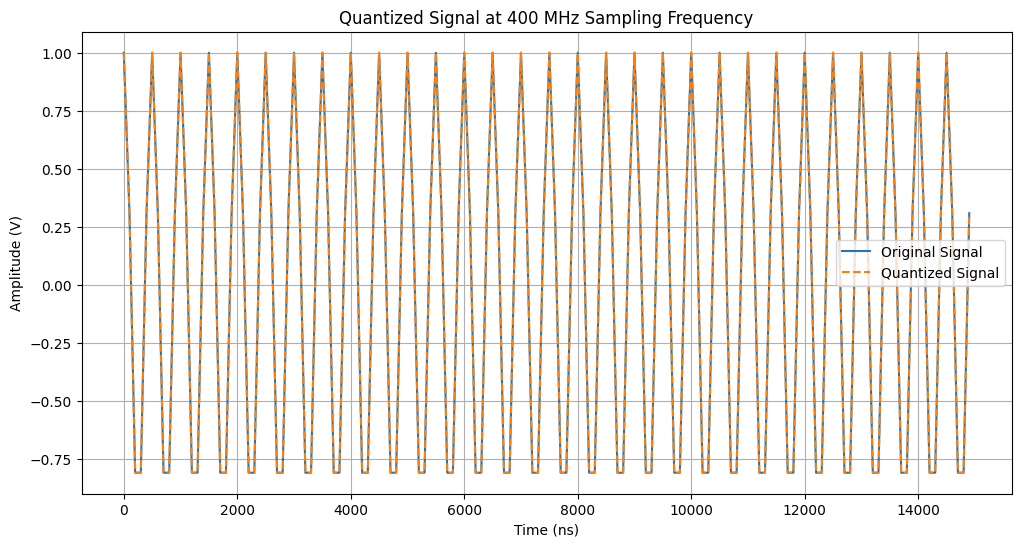

SNR with 12-bit quantization is 81.69560685878184 dB


In [30]:
num_periods = 5  # number of periods to simulate

num_bits = 12
quantization_levels = 2**num_bits

x_quantized = np.round(x_new * (quantization_levels / 2)) / (quantization_levels / 2)

# Plot the quantized signal
plt.figure(figsize=(12, 6))
plt.plot(t_new[:1000] * 1e9, x_new[:1000], label='Original Signal')
plt.plot(t_new[:1000] * 1e9, x_quantized[:1000], label='Quantized Signal', linestyle='--')
plt.title('Quantized Signal at 400 MHz Sampling Frequency')
plt.xlabel('Time (ns)')
plt.ylabel('Amplitude (V)')
plt.legend()
plt.grid(True)
plt.show()

# Calculate SNR for 12-bit quantization
snr_db_quantized = compute_snr_db(x_new, x_quantized)
print("SNR with 12-bit quantization is", snr_db_quantized, "dB")

### (d) Apply a Hanning window
- Repeat (c) with a Hanning window.
- What is the SNR?
- Make your own conclusions.

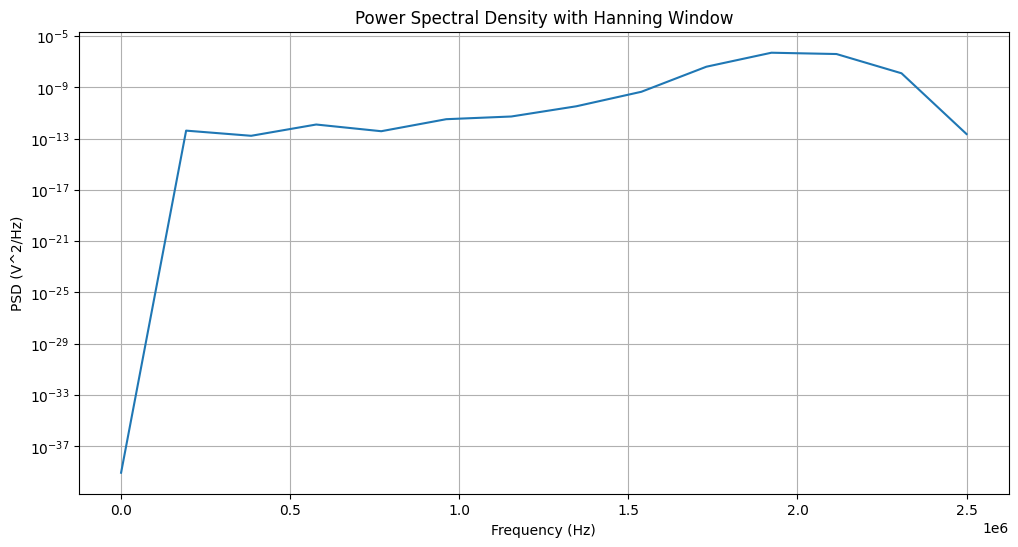

SNR with Hanning window is 51.33238688533516 dB


In [31]:
# Apply Hanning window
hanning_window = np.hanning(len(xs))
xs_windowed_hanning = xs * hanning_window

# Add Gaussian noise to the windowed signal
noisy_signal_windowed_hanning = add_gaussian_noise(xs_windowed_hanning, snr_target_db)

# Compute and plot the Power Spectral Density (PSD) from the DFT of the noisy samples
f, Pxx_den_hanning = signal.periodogram(noisy_signal_windowed_hanning, Fs)

plt.figure(figsize=(12, 6))
plt.semilogy(f, Pxx_den_hanning)
plt.title('Power Spectral Density with Hanning Window')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (V^2/Hz)')
plt.grid(True)
plt.show()

# Compute SNR from the DFT plot
snr_db_windowed_hanning = compute_snr_db(xs_windowed_hanning, noisy_signal_windowed_hanning)
print("SNR with Hanning window is", snr_db_windowed_hanning, "dB")

### (e) Add noise and analyze SNR
- Add noise such that the signal SNR is 38 dB.
- Repeat (c) and (d).
- What are the SNRs?
- Provide conclusions.

----------------------------------------

## 3. ADC Work

In [12]:
#mean of the values in part 2

#all values decibel
peak = -5.812
floor_mean = np.mean([-99.21, -88.23, -86.99, -94.38, -88.89, -90.68, -95.72, -100.67, -97.65, -95.76, -99.34, -87.30, -90.63, -91.55, -101.09])
print("The mean is", floor_mean, "dB")

peak = 10 ** (peak / 10)
floor_mean = 10 ** (floor_mean / 10)

snr = peak / floor_mean
snr_db = 10 * np.log10(snr)
print("The SNR is", snr_db, "linear")

enob = (snr_db - 1.76) / 6.02
print("The Effective Number of Bits is", enob, "bits")

The mean is -93.87266666666665 dB
The SNR is 88.06066666666665 linear
The Effective Number of Bits is 14.335658914728679 bits


In [13]:
peak = -12.03
floor_mean = np.mean([-99.01, -90.18, -86.99, -94.38, -88.89, -90.68, -95.72, -92.88, -92.98, -93.67, -99.93, -87.31, -91.08, -89.98, -101.03])
print("The mean is", floor_mean, "dB")

peak = 10 ** (peak / 10)
floor_mean = 10 ** (floor_mean / 10)

snr = peak / floor_mean
snr_db = 10 * np.log10(snr)
print("The SNR is", snr_db, "linear")

enob = (snr_db - 1.76) / 6.02
print("The Effective Number of Bits is", enob, "bits")

The mean is -92.98066666666665 dB
The SNR is 80.95066666666666 linear
The Effective Number of Bits is 13.154595791805093 bits
